# 선형검색
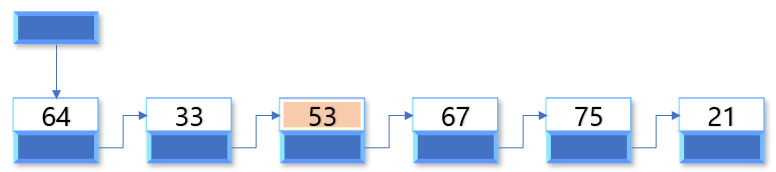  

In [ ]:
#include <stdio.h>
#include <stdlib.h>
int search(const int a[], int n, int key){
    int i  = 0;
    while(1){
        if(i == n) return -1;
        if(a[i] == key) return i;
        i++;
    }
}
int main(){
    int nx, ky;  // nx: 목록갯수, ky: 검색값
    printf("선형검색\n■ 목록 갯수:");
    scanf("%d", &nx);
    int *x = (int *)calloc(nx, sizeof(int));
    printf("\n 1 < [입력값 범위] < 100 \n");
    for(int i = 0; i < nx; i++){
        printf("x[%d] = ", i);
        scanf("%d", x+i);
    }
    printf("■ 총 %d 개 검색 목록 생성 완료\n", nx);
    printf("■ [선형검색] 검색값: ");
    scanf("%d", &ky);
    int idx = search(x, nx, ky);
    if(idx == -1) printf("\n검색 실패\n");
    else printf("\n■ 검색값(%d)은 x[%d] = %d\n", ky, idx, x[idx]);      
    free(x);
}

# 이진검색  

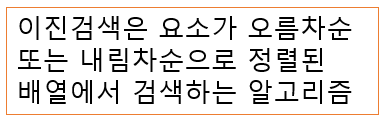  

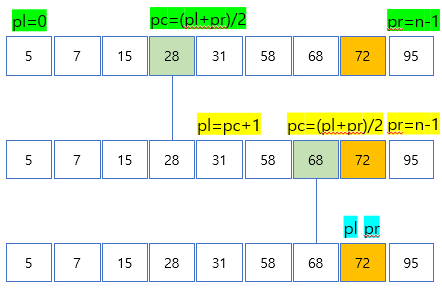


In [ ]:
#include <stdio.h>
#include <stdlib.h>
int bin_search(const int a[], int n, int key){
    int pl = 0; // position left    
    int pr = n-1; // position right
    do{
        int pc = (pl+pr)/2;
        if(a[pc] == key) return pc;
        else if(a[pc] < key) pl = pc + 1;
        else pr = pc - 1;        
    }while(pl <= pr);
    return -1; //검색실패
}
int main(){
    int nx, ky;  // nx: 목록갯수, ky: 검색값
    printf("이진검색\n■ 목록 갯수:");
    scanf("%d", &nx);
    int *x = (int *)calloc(nx, sizeof(int));
    printf("\n[조건] 1<값<100 & 오름차순 입력\n");
    printf("x[%d] = ", 0);
    scanf("%d", x);
    for(int i = 1; i < nx; i++){
        do{
            printf("x[%d] = ", i);
            scanf("%d", x+i);
        }while(x[i] < x[i-1]);
    }
    printf("■ 총 %d 개 검색 목록 생성 완료\n", nx);
    printf("■ [이진검색] 검색값: ");
    scanf("%d", &ky);
    int idx = bin_search(x, nx, ky);
    if(idx == -1) printf("\n검색 실패\n");
    else printf("\n■ 검색값(%d)은 x[%d] = %d\n", ky, idx, x[idx]);      
    free(x);
}

# 함수를 가리키는 포인트

In [ ]:
//함수를 가리키는 포인트
#include <stdio.h>
int sum(int x1, int x2){
    return x1+x2;
}
int mul(int x1, int x2){
    return x1*x2;
}
void func(int(*calc)(int,int)){
    for(int i=1;i<10;i++){
        for(int j=1;j<10;j++)
            printf("%3d", (*calc)(i,j));    
        printf("\n");
    }
}

int main(){
    printf("덧셈표\n");
    func(sum);
    printf("곱셈표\n");
    func(mul);
}

# 구조체 배열 이용하여 함수 포인트 예시

* bsearch 함수 사용  
  > 
헤더: #include&lt;<stdlib.&gt;  
  > 
원 :
void *bsearch(const void *key, void *base, size_t nmemb, size_t size, int(*compar)(const void *, const void *  
  > ;
 
설명:
자료( ase)중
요소크기가 size인 nmemb  중에서 
 compar 비교함수로, ey를 검색
 key와 일치하는 값을 찾으면 요, 의 포인트 반환   
없으면 NULL


In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>  // string

typedef struct _Person{
    char name[20]; //이름
    int height;    //키
    int weight;    //몸무게
} Person;
//비교함수
int npcmp(const Person *x, const Person *y){
    return strcmp(x->name, y->name); // name이 같으면 0 
}
int main(){
    Person x[] = {
    {"hong", 180, 77 },
    {"kim", 183, 79},
    {"yoo", 181, 75},
    {"choi", 173, 60},
    {"cha", 187, 77},
    {"mike", 195, 85},
    };
    int nx  = sizeof(x)/sizeof(Person);
    int retry;
    printf("■함수 포인트 활용\n");
    do {
        Person temp;
        printf("찾는 이름: ");
        scanf("%s", temp.name);
        Person *p = (Person *)bsearch(&temp, x, nx, sizeof(Person),(int(*)(const void *,const void *)) npcmp);
        if(p==NULL) printf("\n검색실패");            
        else printf("x[%d]: %s %d %d\n", (int)(p - x), p->name, p->height, p->weight);        
        
        printf("다시할까요?(1 or 0)");
        scanf("%d",&retry);
    }while(retry==1);
}         


# 스택 Stack ?
- LIFO, Last In First Out

  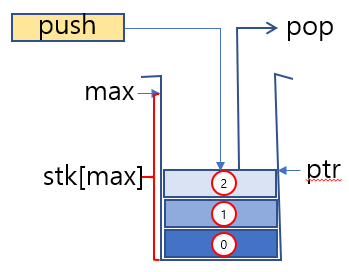  
  

In [ ]:
#include <stdio.h>
#include <stdlib.h>
typedef struct {
    int max;
    int ptr;
    int *stk;
} IntStack;
int Initialize(IntStack *s, int max){
    s->ptr = 0;
    if((s->stk = (int *)calloc(max, sizeof(int))) == NULL){
        s->max = 0;
        return -1;
    }
    s->max = max;
    return 0;
}
int Push(IntStack *s, int x){
    if(s->ptr >= s->max) return -1;
    s->stk[s->ptr++] = x;
    return 0;
}
int Pop(IntStack *s, int *x){
    if(s->ptr <= 0) return -1;
    *x = s->stk[--s->ptr];
    return 0;
}
void Print(const IntStack *s){
    int i;
    for(int i = 0 ; i < s->ptr ; i++) printf("%d ",s->stk[i]);
    printf("\n");
}
/* 스택 종료 */
void Terminate(IntStack *s){
    if(s->stk != NULL) free(s->stk);
    s->max = s->ptr = 0;
}
int main(){
    IntStack s;
    if(Initialize(&s, 64) == -1){
        printf("스택 생성 실패");
        return 1;
    }
    printf("스택 시작\n");
    while(1){
        int menu,x; //데이터 x
        printf("■ 스택프로그램\n (1) Push\n (2)Pop\n (3)출력\n (0)종료 \n선택하시오: ");    
        scanf("%d",&menu);
        if(menu == 0) break;
        switch(menu) {
        case 1:
            printf("■ Push 정수 데이터: ");
            scanf("%d", &x);
            if(Push(&s,x) == -1) printf("Error: 푸시 실패");
            break;
        case 2:
            if(Pop(&s, &x) == -1) printf("Error: 팝 실패");
            else printf("■ Pop 데이터: %d\n",x);
            break;
        case 3:
            Print(&s);
            break;
        }
    }
    Terminate(&s);
}


# 큐 Queue  

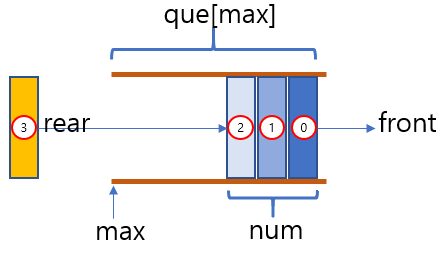  

In [ ]:
#include <stdio.h>
#include <stdlib.h>
typedef struct {
    int max;
    int num;
    int *que;
    int front;
    int rear;
} IntQueue;
int Initialize(IntQueue *q, int max){
    q->num = q->front = q->rear = 0;
    if((q->que = (int *)calloc(max, sizeof(int))) == NULL){
        q->max = 0;
        return -1;
    }
    q->max = max;
    return 0;
}
int Enque(IntQueue *q, int x){
    if(q->num >= q->max) return -1;
    else{
        q->num++;
        q->que[q->rear++] = x;
        if(q->rear == q->max) q->rear = 0;
        return 0;
    }
}
int Deque(IntQueue *q, int *x){    
    if(q->num <= 0) return -1;
    else{
        q->num--;
        *x = q->que[q->front++];
        if(q->front == q->max) q->front = 0;
        return 0;
    }
}
void Print(const IntQueue *q){
    int i;
    printf("========\n");
    for(int i = 0 ; i < q->num ; i++) printf("%d ",q->que[(i+q->front) % q->max]);     
    printf("\n========\n");
}
/* 큐 종료 */
void Terminate(IntQueue *q){
    if(q->que != NULL) free(q->que);
    q->max = q->num = q->front = q->rear = 0;
}
int main(){
    IntQueue que;
    if(Initialize(&que, 64) == -1){
        printf("큐 생성 실패");
        return 1;
    }
    printf("스택 시작\n");
    while(1){
        int menu,x; //데이터 x
        printf("■ 큐프로그램\n (1) 인큐\n (2) 디큐\n (3)출력\n (0)종료 \n선택하시오: ");    
        scanf("%d",&menu);
        if(menu == 0) break;
        switch(menu) {
        case 1:
            printf("■ 인큐 정수 데이터: ");
            scanf("%d", &x);
            if(Enque(&que,x) == -1) printf("Error: 인큐 실패");
            break;
        case 2:
            if(Deque(&que, &x) == -1) printf("Error: 디큐 실패");
            else printf("■ 디큐 데이터: %d\n",x);
            break;
        case 3:
            Print(&que);
            break;
        }
    }
    Terminate(&que);
}
